In [6]:
#import

import pandas as pd
import numpy as np

In [7]:
#df = pd.read_csv("gnb_normalize_dataset_fix.csv")
df = pd.read_csv("dataset_iklim.csv", delimiter=";", thousands=".", decimal=",")

# set column names
df.columns = ['tanggal', 'tn', 'tx', 'tavg', 'rh_avg', 'rr', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

df

,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2022,20.4,29.0,24.3,82,25.1,3.4,3,120,1,C
1,02-01-2022,20.4,28.6,24.1,82,6.4,3.0,3,150,2,SE
2,03-01-2022,20.7,29.4,24.4,80,2.9,4.1,4,150,2,SE
3,04-01-2022,20.2,28.6,24.1,81,8888.0,7.3,5,180,2,C
4,05-01-2022,19.6,28.8,24.3,78,0.8,4.1,5,150,2,S
...,...,...,...,...,...,...,...,...,...,...,...
246,04-09-2022,19.8,29.0,23.7,78,0.0,9.0,3,170,2,S
247,05-09-2022,19.4,29.3,23.8,78,16.4,5.7,5,90,2,C
248,06-09-2022,19.0,29.4,23.6,81,0.0,2.6,4,140,1,C
249,07-09-2022,19.0,28.8,24.1,83,0.0,5.2,4,200,2,S


- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum (°C)
- Tx: Temperatur maksimum (°C)
- Tavg: Temperatur rata-rata (°C)
- RH_avg: Kelembapan rata-rata (%)
- RR: Curah hujan (mm)
- ss: Lamanya penyinaran matahari (jam)
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)

Next... checking datatypes

In [8]:
print(df.dtypes)

tanggal     object
tn         float64
tx         float64
tavg       float64
rh_avg       int64
rr         float64
ss         float64
ff_x         int64
ddd_x        int64
ff_avg       int64
ddd_car     object
dtype: object


We have properly datatypes... let's check the rows x columns size

In [9]:
print(df.shape)
df

(251, 11)


,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2022,20.4,29.0,24.3,82,25.1,3.4,3,120,1,C
1,02-01-2022,20.4,28.6,24.1,82,6.4,3.0,3,150,2,SE
2,03-01-2022,20.7,29.4,24.4,80,2.9,4.1,4,150,2,SE
3,04-01-2022,20.2,28.6,24.1,81,8888.0,7.3,5,180,2,C
4,05-01-2022,19.6,28.8,24.3,78,0.8,4.1,5,150,2,S
...,...,...,...,...,...,...,...,...,...,...,...
246,04-09-2022,19.8,29.0,23.7,78,0.0,9.0,3,170,2,S
247,05-09-2022,19.4,29.3,23.8,78,16.4,5.7,5,90,2,C
248,06-09-2022,19.0,29.4,23.6,81,0.0,2.6,4,140,1,C
249,07-09-2022,19.0,28.8,24.1,83,0.0,5.2,4,200,2,S


let's do data pre-processing, we will drop the rows with missing values

In [ ]:
df = df.dropna()

then, drop the rows with value 8888 (data tidak terukur a.k.a not measured) and 9999 (Tidak Ada Data (tidak dilakukan pengukuran) a.k.a no data), because we don't need it. 

Based on observation above, the value with 8888 and 9999 is only in the columns with column called rr (curah hujan)

In [10]:
# delete row with 8888 value
df.drop(df[df['rr'] == 8888].index, inplace=True)
df

,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2022,20.4,29.0,24.3,82,25.1,3.4,3,120,1,C
1,02-01-2022,20.4,28.6,24.1,82,6.4,3.0,3,150,2,SE
2,03-01-2022,20.7,29.4,24.4,80,2.9,4.1,4,150,2,SE
4,05-01-2022,19.6,28.8,24.3,78,0.8,4.1,5,150,2,S
5,06-01-2022,19.2,29.3,23.9,76,0.0,7.4,3,130,1,C
...,...,...,...,...,...,...,...,...,...,...,...
246,04-09-2022,19.8,29.0,23.7,78,0.0,9.0,3,170,2,S
247,05-09-2022,19.4,29.3,23.8,78,16.4,5.7,5,90,2,C
248,06-09-2022,19.0,29.4,23.6,81,0.0,2.6,4,140,1,C
249,07-09-2022,19.0,28.8,24.1,83,0.0,5.2,4,200,2,S


In [11]:
# labelling df

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_labelled = df.apply(le.fit_transform)
df_labelled.head()

,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car
0,0,33,24,24,20,68,23,1,10,1,0
1,9,33,20,22,20,40,20,1,13,2,6
2,17,36,28,25,18,22,30,2,13,2,6
4,33,25,22,24,16,7,30,3,13,2,5
5,42,21,27,20,14,0,63,1,11,1,0


In [12]:
# min max normalization sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_labelled)
df_norm = scaler.transform(df_labelled)
df_norm = pd.DataFrame(df_norm, columns=df_labelled.columns)
df_norm.head()

,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car
0,-1.724789,0.227676,0.095007,0.337610,0.426288,1.612265,-0.998162,-1.036126,-0.006245,-1.063192,-0.800824
1,-1.593792,0.227676,-0.361793,0.097756,0.426288,0.628640,-1.123349,-1.036126,0.489189,0.399465,1.707019
2,-1.477350,0.502737,0.551806,0.457537,0.081784,-0.003690,-0.706060,-0.224948,0.489189,0.399465,1.707019
3,-1.244468,-0.505819,-0.133393,0.337610,-0.262721,-0.530632,-0.706060,0.586229,0.489189,0.399465,1.289045
4,-1.113471,-0.872567,0.437606,-0.142099,-0.607225,-0.776538,0.670994,-1.036126,0.158900,-1.063192,-0.800824


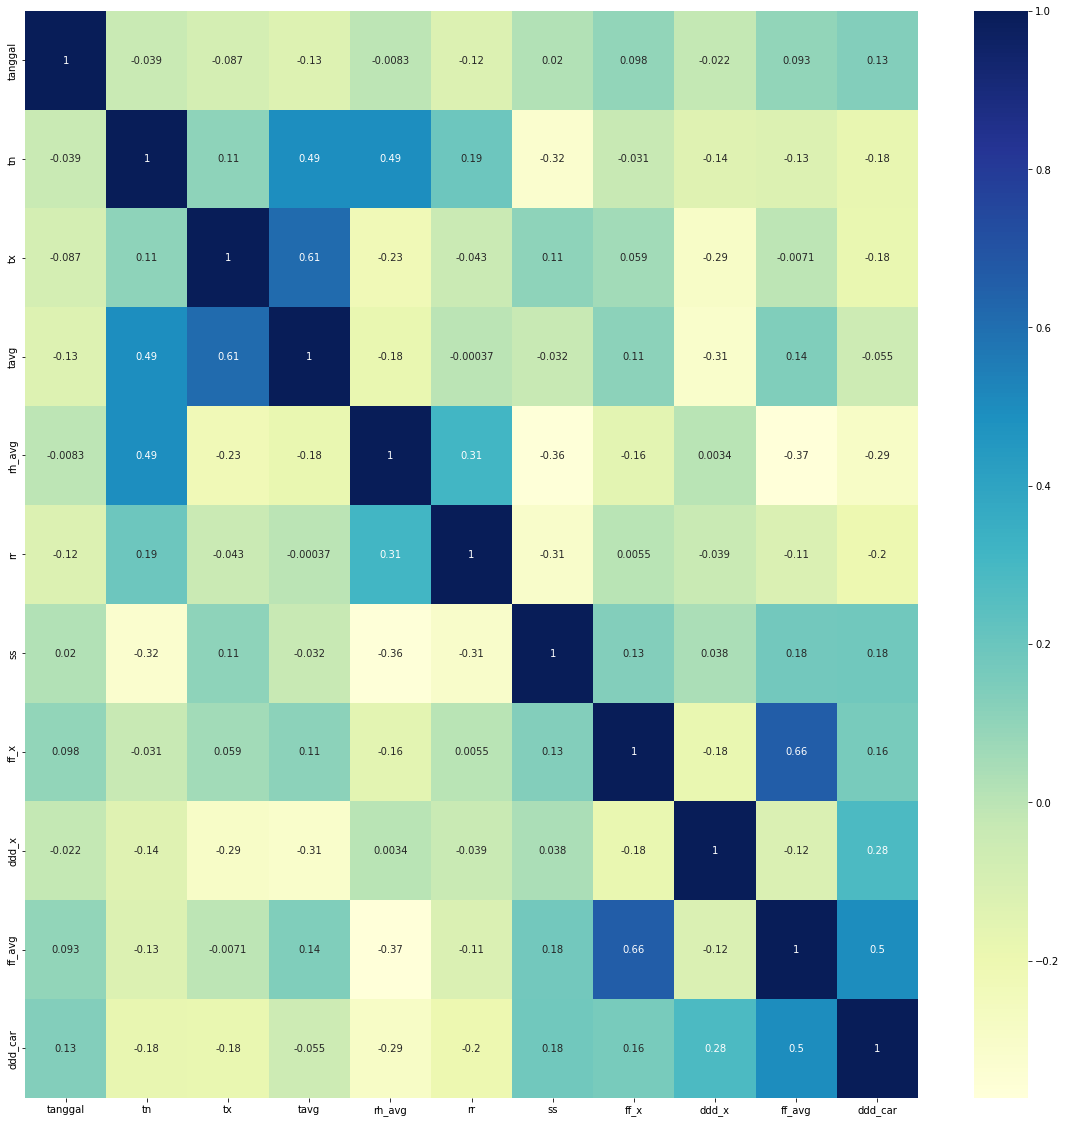

In [13]:
# correlation matrix
corr = df_norm.corr()
corr

# plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
# increase the size of the plot
plt.figure(figsize=(20,20))

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu",
        annot=True)

plt.show()


In [30]:
#  variabel bebas
print(df_norm.columns)
y = df_norm['rr']
df = df_norm.drop(["rr","tanggal"], axis = 1)
#variabel tidak bebas
df

Index(['tanggal', 'tn', 'tx', 'tavg', 'rh_avg', 'rr', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car'],
      dtype='object')


,tn,tx,tavg,rh_avg,ss,ff_x,ddd_x,ff_avg,ddd_car
0,0.227676,0.095007,0.337610,0.426288,-0.998162,-1.036126,-0.006245,-1.063192,-0.800824
1,0.227676,-0.361793,0.097756,0.426288,-1.123349,-1.036126,0.489189,0.399465,1.707019
2,0.502737,0.551806,0.457537,0.081784,-0.706060,-0.224948,0.489189,0.399465,1.707019
3,-0.505819,-0.133393,0.337610,-0.262721,-0.706060,0.586229,0.489189,0.399465,1.289045
4,-0.872567,0.437606,-0.142099,-0.607225,0.670994,-1.036126,0.158900,-1.063192,-0.800824
...,...,...,...,...,...,...,...,...,...
233,-0.322445,0.095007,-0.381953,-0.262721,1.255198,-1.036126,0.819478,0.399465,1.289045
234,-0.689193,0.437606,-0.262026,-0.262721,-0.038398,0.586229,-0.501679,0.399465,-0.800824
235,-1.055941,0.551806,-0.501880,0.254036,-1.290264,-0.224948,0.324044,-1.063192,-0.800824
236,-1.055941,-0.133393,0.097756,0.598540,-0.247042,-0.224948,1.314912,0.399465,1.289045


In [32]:
x = df.values

x

array([[ 0.22767643,  0.09500662,  0.33761002, ..., -0.00624497,
        -1.06319204, -0.80082368],
       [ 0.22767643, -0.36179289,  0.09775574, ...,  0.48918893,
         0.39946522,  1.70701889],
       [ 0.5027373 ,  0.55180614,  0.45753717, ...,  0.48918893,
         0.39946522,  1.70701889],
       ...,
       [-1.05594095,  0.55180614, -0.50187998, ...,  0.3240443 ,
        -1.06319204, -0.80082368],
       [-1.05594095, -0.13339314,  0.09775574, ...,  1.31491208,
         0.39946522,  1.28904513],
       [-0.78088008,  1.12280553, -0.62180712, ..., -0.1713896 ,
         0.39946522, -0.80082368]])

In [33]:
# separate the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((190, 9), (48, 9), (190,), (48,))

In [34]:
# import the model using gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

# create the model
model = GaussianNB()

# train the model
model.fit(x_train, y_train)

# predict the model
y_pred = model.predict(x_test)
y_pred


ValueError: Unknown label type: (array([-0.7765382 , -0.74140874, -0.70627928, -0.67114982, -0.63602036,
       -0.6008909 , -0.56576144, -0.53063198, -0.49550252, -0.46037306,
       -0.4252436 , -0.39011413, -0.31985521, -0.28472575, -0.24959629,
       -0.21446683, -0.17933737, -0.14420791, -0.10907845, -0.07394899,
       -0.03881953, -0.00369007,  0.03143939,  0.06656885,  0.10169831,
        0.13682777,  0.20708669,  0.24221615,  0.27734561,  0.31247508,
        0.34760454,  0.382734  ,  0.41786346,  0.45299292,  0.52325184,
        0.5583813 ,  0.59351076,  0.62864022,  0.66376968,  0.7340286 ,
        0.76915806,  0.80428752,  0.87454644,  0.9096759 ,  0.94480536,
        0.97993482,  1.01506428,  1.05019375,  1.12045267,  1.15558213,
        1.22584105,  1.26097051,  1.29609997,  1.40148835,  1.43661781,
        1.47174727,  1.54200619,  1.57713565,  1.61226511,  1.64739457,
        1.68252403,  1.71765349,  1.75278296,  1.82304188,  1.85817134,
        1.8933008 ,  1.99868918,  2.03381864,  2.10407756,  2.13920702,
        2.17433648,  2.20946594,  2.2445954 ,  2.27972486,  2.31485432,
        2.34998378,  2.4202427 ]),)

In [19]:
# show the y_test based on separation dataset
# np.array(y_test)

# show the confusion matrix based on the prediction result 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

#evaluate performance from the confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

# this value will show all probability for each predicted class 
model.predict_proba(x_test)

NameError: name 'y_pred' is not defined